In [ ]:
# EXTRACTING LIABRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# LOAD DATASETS

sp = pd.read_csv("/content/drive/MyDrive/DATASCIENCE/advertising.csv")
sp

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Basic information about data

sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Demonstrate The Dataset Statistics

sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Showcase Dataset glimpse

sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


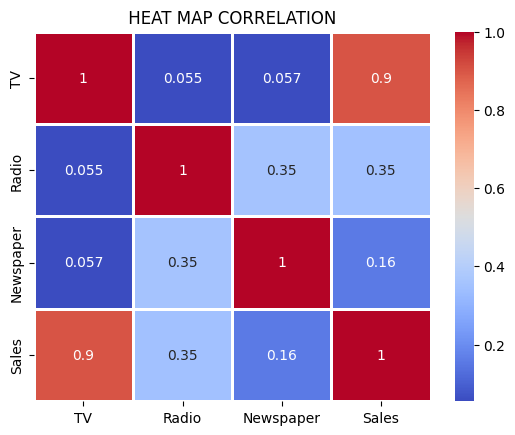

In [ ]:
# Creating correlation matrix

correlation_matrix = sp.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = "coolwarm" , linewidths = 1, cbar = True)
plt.title(" HEAT MAP CORRELATION ")
plt.show()

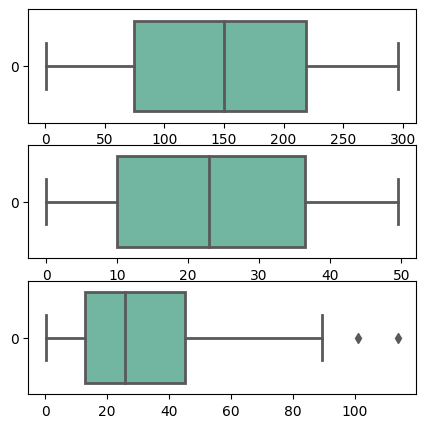

In [ ]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))

sns.boxplot(sp['TV'], ax = axs[0], orient = "h", palette = "Set2", linewidth =
2)
sns.boxplot(sp['Radio'], ax = axs[1], orient = "h", palette = "Set2", linewidth =
2)
sns.boxplot(sp['Newspaper'], ax = axs[2], orient = "h", palette = "Set2", linewidth =
2)
plt.show()

<Axes: title={'center': 'Scatter Plot of TV vs Sals'}, xlabel='TV', ylabel='Sales'>

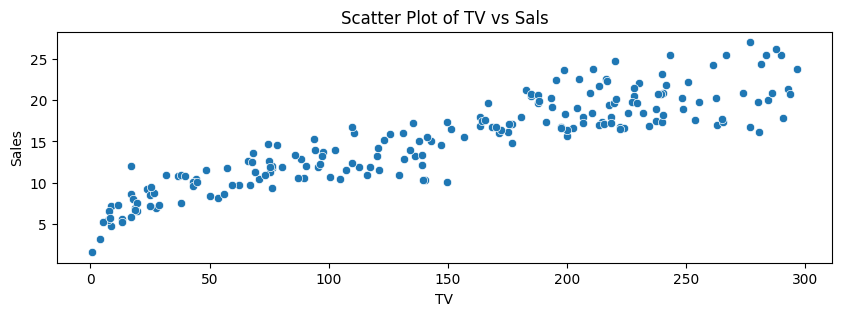

In [ ]:
# Creating Scatter Plot

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Scatter Plot of TV vs Sals")
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = sp , x = "TV" , y = "Sales")

<Axes: title={'center': 'Scatter Plot of Radio vs Sals'}, xlabel='Radio', ylabel='Sales'>

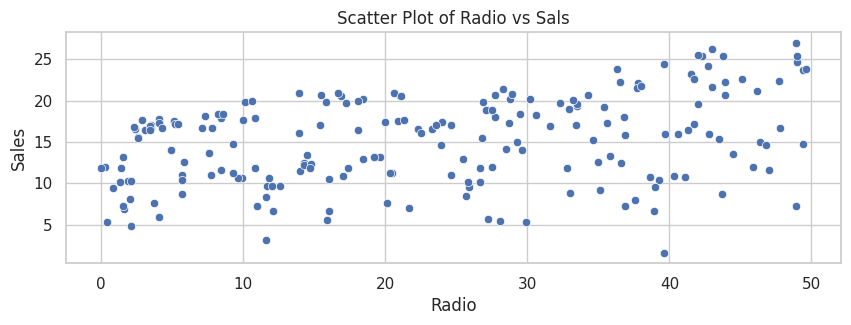

In [ ]:
# Creating Scatter Plot

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Scatter Plot of Radio vs Sals")
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = sp , x = "Radio" , y = "Sales")

<Axes: title={'center': 'Scatter Plot of Nwespaper vs Sals'}, xlabel='Newspaper', ylabel='Sales'>

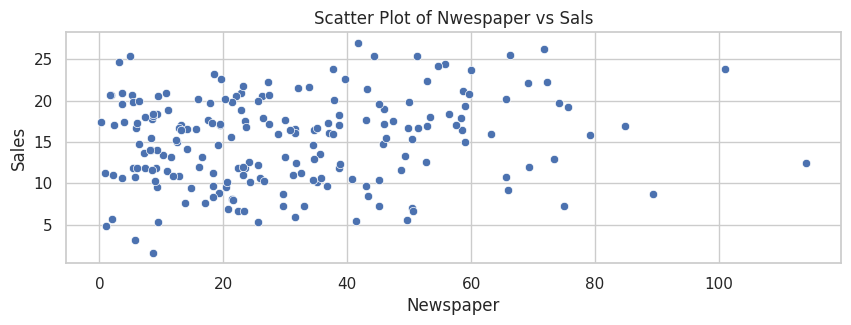

In [ ]:
# Creating Scatter Plot

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Scatter Plot of Nwespaper vs Sals")
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = sp , x = "Newspaper" , y = "Sales")

In [ ]:
# Perform Linear Regression

x = sp[['Radio' , 'Newspaper' , 'TV']]
y = sp['Sales']

x = sp[['Radio' , 'Newspaper' , 'TV']]
y = sp['Sales']

# Train - Tet Split

x_train, x_test , y_train , y_test = train_test_split(x , y , train_size = 0.7 , test_size = 0.3 , random_state = 10)
x_train.head()

,Radio,Newspaper,TV
119,16.0,22.3,19.4
110,8.2,56.5,225.8
95,31.6,52.9,163.3
167,5.2,19.4,206.8
193,42.0,3.6,166.8


In [ ]:
y_train.head()

119     6.6
110    18.4
95     16.9
167    17.2
193    19.6
Name: Sales, dtype: float64

In [ ]:
# Creating Linear Model

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const        4.912326
Radio        0.107522
Newspaper    0.000434
TV           0.052393
dtype: float64

In [ ]:
# Print Linear Regression Summary

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     406.4
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.13e-67
Time:                        03:15:54   Log-Likelihood:                -258.26
No. Observations:                 140   AIC:                             524.5
Df Residuals:                     136   BIC:                             536.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9123      0.351     14.010      0.0